In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:

   
def gender_func(x):
    gender = []
    if x['gender_not_listed']:
        gender.append('not listed')
    if x['gender_choose_not_to_identify']:
        gender.append('undisclosed')
    if x['cisgender_man']:
        gender.append('cisgender man')
    if x['cisgender_woman']:
        gender.append('cisgender woman')
    if x['non_conforming_or_non_binary']:
        gender.append('non-binary')
    if x['transgender_man']:
        gender.append('transgender man')
    if x['transgender_woman']:
        gender.append('transgender woman')
    if x['man']:
        gender.append('man')
    if x['woman']:
        gender.append('woman')
    if gender == []:
        gender.append('undisclosed')
    
    return ', '.join(gender)

In [128]:
df = pd.read_csv('globalcount_data1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [27]:
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,Political,NaN,Political,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Ac

In [62]:
df['gender_list'] = df.apply(gender_func, axis = 1)
df['gender_list']

0                         woman
1                         woman
2                   undisclosed
3                         woman
4                    not listed
                  ...          
24046                     woman
24047                     woman
24048                     woman
24049                     woman
24050    cisgender woman, woman
Name: gender_list, Length: 24051, dtype: object

In [29]:
issues_global = df.columns[34:46]

In [30]:
issues_local = df.columns[58:70]

In [31]:
issues_all = issues_global.append(issues_local)

In [97]:
barrier = df.columns[46:57]

In [124]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in barrier], var_name = 'barrier')
df_long.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score,gender_list,barrier,value
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,0,0,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman,barrier_person_civil_rights_and_freedoms,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,0,0,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00,woman,barrier_person_civil_rights_and_freedoms,NaN
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undisclosed,barrier_person_civil_rights_and_freedoms,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,1,0,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97,woman,barrier_person_civil_rights_and_freedoms,NaN
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,0,0,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. A

In [126]:
#%of respondants to barrier to ending violence,harassment,abuse
df_barrier_violence = df_long.pivot_table(index='country_of_residence', columns='barrier_person_ending_violence_harassment_and_abuse', aggfunc='sum')
df_barrier_violence

KeyError: ignored

In [134]:
# primary barrier of reproductive freedom
df_barrier_reproductive = df.pivot_table(index = 'country_of_residence',columns='barrier_person_reproductive_freedom_and_bodily_autonomy',aggfunc=np.sum, fill_value=0)
df_barrier_reproductive

asian  ...         woman
barrier_person_reproductive_freedom_and_bodily_autonomy Cultural/Social  ... Technological
country_of_residence                                                     ...              
Afghanistan                                                          21  ...             2
Angola                                                                0  ...             1
Argentina                                                             0  ...             0
Armenia                                                               0  ...             0
Australia                                                             0  ...             0
...                                                                 ...  ...           ...
United States of America                                              1  ...             1
Uruguay                                                               0  ...             0
Venezuela (Bolivarian Republic of)                                    0  ...             0
Zambia                                                                0  ...             2
Zimbabwe                                                              0  ...             0

[84 rows x 260 columns]

In [83]:
# primary barrier of transgender man in LGBT
df_barrier_LGBT = df_long.pivot_table(index='transgender_man', columns='barrier_person_LGBTQI+_rights', 
                    values='value',aggfunc=np.sum, fill_value=0)
df_barrier_LGBT


barrier_person_LGBTQI+_rights,Cultural/Social,Economic,Education,Political,Technological
transgender_man,,,,,
0,5025,64,847,3615,87
1,24,0,18,35,0


In [84]:
df_barrier_LGBT.groupby(df_long['transgender_man']).sum()

barrier_person_LGBTQI+_rights,Cultural/Social,Economic,Education,Political,Technological
transgender_man,,,,,
0,5049,64,865,3650,87


In [89]:
# primary barrier of hispanic or latinx woman in racial equity
df_barrier_racial = df_long.pivot_table(index='hispanic_or_latinx', columns='barrier_racial_equity', 
                    values='value',aggfunc=np.sum, fill_value=0)
df_barrier_racial
df_barrier_racical_woman = df_barrier_racial.groupby(df_long['gender_list']).sum()
df_barrier_racical_woman

barrier_racial_equity,Cultural/Social,Economic,Education,Political,Technological
gender_list,,,,,
woman,7808,1476,2360,5720,127


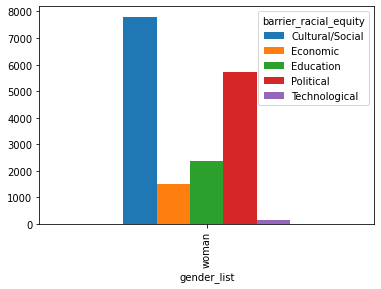

In [91]:
df_barrier_racical_woman.plot(kind='bar')

In [102]:
woman = df[(df['woman'] == 1) & (df['hispanic_or_latinx'] == 1)].groupby('barrier_racial_equity').count().unique_id
woman

barrier_racial_equity
Cultural/Social    62
Economic           11
Education          23
Political          17
Name: unique_id, dtype: int64

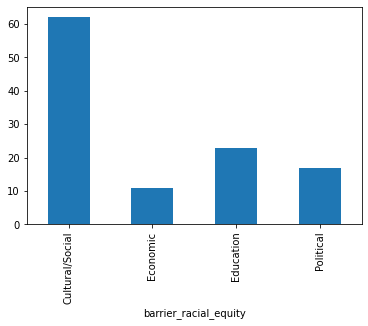

In [103]:
woman.plot(kind='bar')

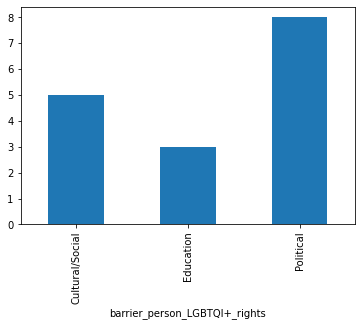

In [105]:
transgender_man = df[(df['transgender_man'] == 1)].groupby('barrier_person_LGBTQI+_rights').count().unique_id
transgender_man
transgender_man.plot(kind='bar')

In [139]:
df[(df['barrier_person_reproductive_freedom_and_bodily_autonomy'].groupby('country_of_residence').count()

SyntaxError: ignored

In [123]:
#%of respondants to barrier to ending violence,harassment,abuse
df_barrier_violence = df.pivot_table(index='country_of_residence', columns='barrier_person_ending_violence_harassment_and_abuse',
                                     values = 'value', aggfunc='sum')
df_barrier_violence

KeyError: ignored

In [122]:
df['barrier_city_ending_violence_harassment_and_abuse']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
24046          NaN
24047    Education
24048          NaN
24049          NaN
24050          NaN
Name: barrier_city_ending_violence_harassment_and_abuse, Length: 24051, dtype: object